In [135]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key
import json
import time
from datetime import date, timedelta

# Using pycountry to obtain full names of the countries
# source: https://pypi.org/project/pycountry/
import pycountry

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Range of latitudes and longitudes
range_of_latitude = (-90, 90)
range_of_longitude = (-180, 180)

output_path = os.path.join('..','Outputs')
images_path = os.path.join('..','Outputs', 'Images')

# The weather data was acquired on 02/01/20
# To assure accuracy, Change this number to match the exact date of data retrieval
day_since_data_request = 1

In [136]:
weather_df = pd.read_csv(output_path + '/weather_df.csv')
weather_df.head()

,City,Country,Country Code,Date,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,Tonga,TO,1580600753,-21.20,-175.20,84.20,70.0,40.0,8.05
1,Grindavik,Iceland,IS,1580600944,63.84,-22.43,28.40,86.0,75.0,10.29
2,Bermejo,"Bolivia, Plurinational State of",AR,1580600945,-32.88,-68.80,95.00,21.0,40.0,4.70
3,Tocopilla,Chile,CL,1580600945,-22.09,-70.20,60.04,57.0,3.0,3.00
4,Arraial Do Cabo,Brazil,BR,1580600865,-22.97,-42.03,80.11,85.0,88.0,10.36


In [137]:
def annotate_equator_and_poles(axes_handle, y_min, y_max):
    #Equator
    axes_handle.plot([0,0],[y_min, y_max],color = 'firebrick')
    axes_handle.annotate('Equator', (-8, y_min - (y_min*0.15)), fontsize = 14, color = 'firebrick', rotation = 90)
    # North Pole
    axes_handle.plot([90,90],[y_min, y_max],color = 'lightskyblue')
    axes_handle.annotate('North Pole', (82, y_min - (y_min*0.15)), fontsize = 14, color = 'lightskyblue', rotation = 90)
    # South Pole
    axes_handle.plot([-90,-90],[y_min, y_max],color = 'lightskyblue')
    axes_handle.annotate('South Pole', (-96, y_min - (y_min*0.15)), fontsize = 14, color = 'lightskyblue', rotation = 90)
    
    return axes_handle

In [138]:
def plot_weather_data_vs_latitude(x_values, y_values, y_label):
    # Set-up figure
    fig1, ax1 = plt.subplots(figsize=(8,6))
    
    ax1.set_xlabel('Latitude', fontsize = 14)
    ax1.set_ylabel(f'{y_label}', fontsize = 14);
    colors = y_values;
    ax1.scatter(x_values, y_values, alpha = 0.3, c = colors);

    ax1.set_xlim([-100,100]);
    xticks_values = [_ for _ in range(-105,105,15)];
    ax1.set_xticks(xticks_values[1:len(xticks_values)]);
    
    ax1.tick_params(axis='both', which='major', labelsize=12)

    return fig1, ax1

### Latitude vs Temperature

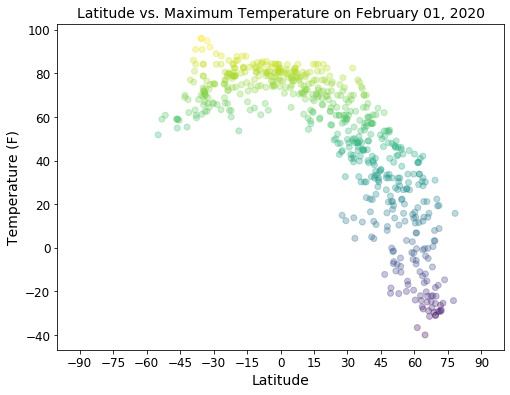

In [139]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'], \
                                          weather_df['Max Temp'], \
                                          'Temperature (F)');
ax1.set_title('Latitude vs. Maximum Temperature on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);

plt.show()

### Latitude vs Hunidity

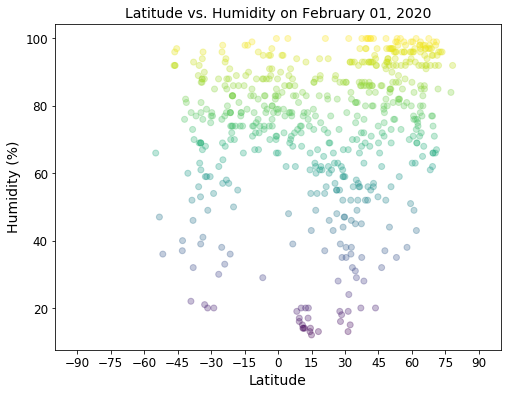

In [140]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'], \
                                          weather_df['Humidity'], \
                                          'Humidity (%)');
ax1.set_title('Latitude vs. Humidity on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);

plt.show()

### Latitude vs. Cloudiness

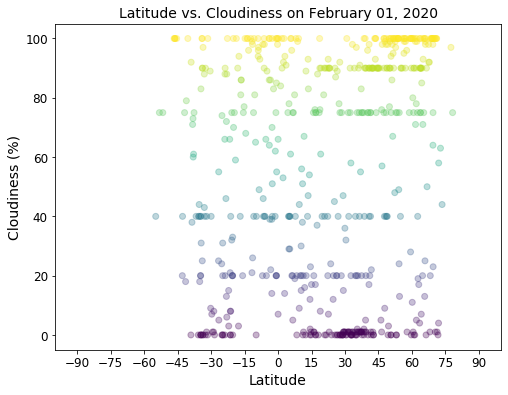

In [141]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'], \
                                          weather_df['Cloudiness'], \
                                          'Cloudiness (%)');
ax1.set_title('Latitude vs. Cloudiness on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);

plt.show()

### Latitude vs. Wind Speed

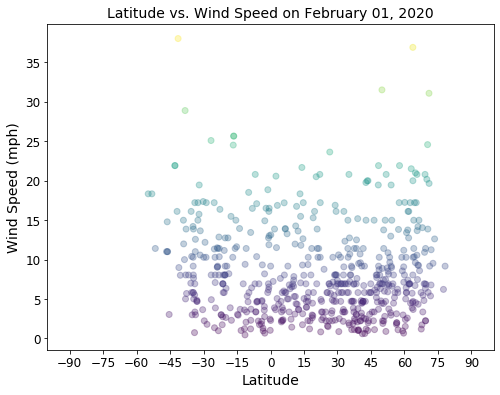

In [142]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'],\
                                          weather_df['Wind Speed'],\
                                          'Wind Speed (mph)');
ax1.set_title('Latitude vs. Wind Speed on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);

plt.show()

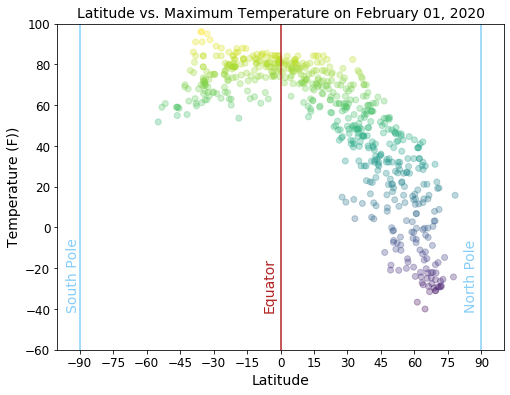

In [96]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Latitude vs. Maximum Temperature on ' + (date.today() - timedelta(days=1)).strftime('%B %d, %Y'), fontsize = 14);
ax1.set_xlabel('Latitude', fontsize = 14)
ax1.set_ylabel('Temperature (F))', fontsize = 14);
colors = weather_df['Max Temp'];
ax1.scatter(weather_df['Latitude'], weather_df['Max Temp'], alpha = 0.3, c = colors);

ax1.set_xlim([-100,100]);
ax1.set_ylim([-60,100]);
xticks_values = [_ for _ in range(-105,105,15)];
ax1.set_xticks(xticks_values[1:len(xticks_values)]);
ax1.tick_params(axis='both', which='major', labelsize=12)

#Equator
ax1.plot([0,0],[-60, 100],color = 'firebrick')
ax1.annotate('Equator', (-8,-40), fontsize = 14, color = 'firebrick', rotation = 90)
# North Pole
ax1.plot([90,90],[-60, 100],color = 'lightskyblue')
ax1.annotate('North Pole', (82,-40), fontsize = 14, color = 'lightskyblue', rotation = 90)
# South Pole
ax1.plot([-90,-90],[-60, 100],color = 'lightskyblue')
ax1.annotate('South Pole', (-96,-40), fontsize = 14, color = 'lightskyblue', rotation = 90)


plt.savefig(images_path + "/Variation_of_max_temperature_with_latitude.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

Observation: In general, the maximum temperature increases as distance towards the equator decreases.

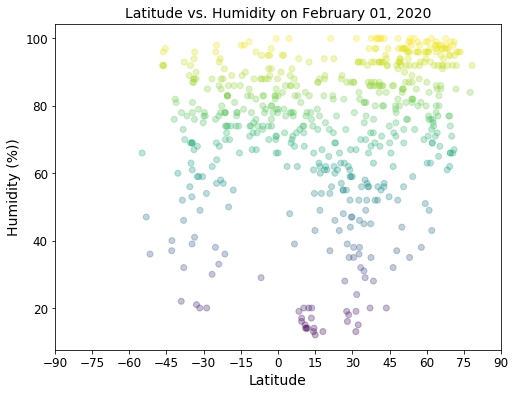

In [60]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Latitude vs. Humidity on ' + (date.today() - timedelta(days=1)).strftime('%B %d, %Y'), fontsize = 14);
ax1.set_xlabel('Latitude', fontsize = 14)
ax1.set_ylabel('Humidity (%))', fontsize = 14);
colors = weather_df['Humidity'];
ax1.scatter(weather_df['Latitude'], weather_df['Humidity'], alpha = 0.3, c = colors);

ax1.set_xlim([-100,100]);
# ax1.set_ylim([-60,100]);
# xticks_values = [_ for _ in range(-105,105,15)];
ax1.set_xticks(xticks_values[1:len(xticks_values)]);
ax1.tick_params(axis='both', which='major', labelsize=12)

#Equator
# ax1.plot([0,0],[-60, 100],color = 'firebrick')
# ax1.annotate('Equator', (-8,-40), fontsize = 14, color = 'firebrick', rotation = 90)
# North Pole
# ax1.plot([90,90],[-60, 100],color = 'lightskyblue')
# ax1.annotate('North Pole', (82,-40), fontsize = 14, color = 'lightskyblue', rotation = 90)
# South Pole
# ax1.plot([-90,-90],[-60, 100],color = 'lightskyblue')
# ax1.annotate('South Pole', (-96,-40), fontsize = 14, color = 'lightskyblue', rotation = 90)


# plt.savefig(images_path + "/Variation_of_max_temperature_with_latitude.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()